In [1]:
f = open("token.txt", "r")
token = f.read()

In [2]:
import quandl
quandl.ApiConfig.api_key = token

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from functools import reduce

In [4]:
wti_crude = quandl.get("EIA/PET_RWTC_D", start_date = '2001-12-31')

In [5]:
wti_crude.rename(columns = {'Value':'Petroleo'}, inplace = True)

C:\Users\rlpro\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

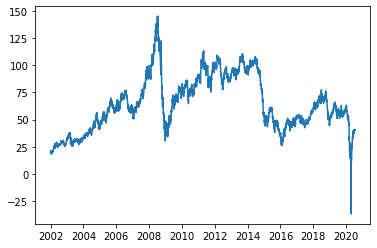

In [6]:
plt.plot(wti_crude)
plt.show

In [7]:
selic = quandl.get("BCB/432", start_date = '2001-12-31')

In [8]:
selic.rename (columns={'Value':"selic"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

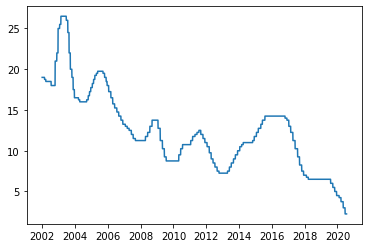

In [9]:
plt.plot(selic)
plt.show

In [10]:
ipca = quandl.get("BCB/13522", start_date = '2001-12-31')

In [11]:
ipca.rename (columns={'Value':"ipca"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

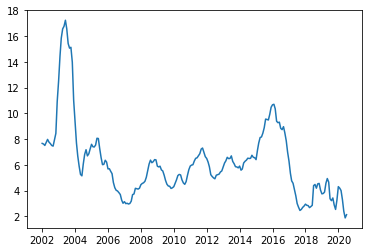

In [12]:
plt.plot(ipca)
plt.show

In [13]:
dolar = quandl.get("bcb/10813", start_date = '2001-12-31')

In [14]:
dolar.rename (columns={'Value':"dolar"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

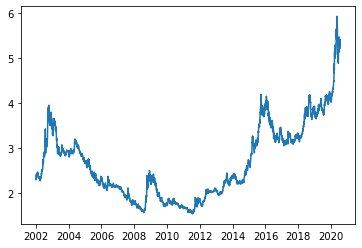

In [15]:
plt.plot(dolar)
plt.show

In [16]:
ouro = quandl.get("bcb/4", start_date = '2001-12-31')

In [17]:
ouro.rename (columns={'Value':"ouro"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

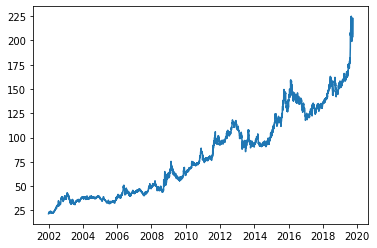

In [18]:
plt.plot(ouro)
plt.show

In [19]:
cdi = quandl.get("bcb/4392", start_date = '2001-12-31')

In [20]:
cdi.rename (columns={'Value':"CDI"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

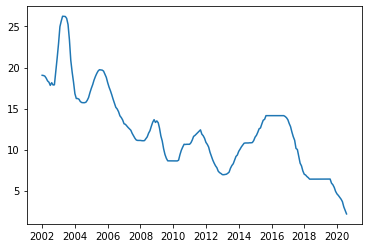

In [21]:
plt.plot(cdi)
plt.show

In [22]:
PIB_BR = quandl.get("ODA/BRA_NGDPD", start_date = '2001-12-31')

In [23]:
PIB_BR.rename (columns={'Value':"PIB_BR"}, inplace = True)

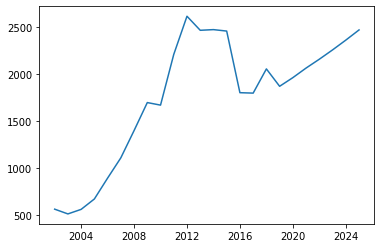

In [24]:
plt.plot(PIB_BR)
plt.show()

In [25]:
ibov = quandl.get("BCB/7845", start_date = '2001-12-31')

In [26]:
ibov.rename (columns={'Value':"IBOV"}, inplace = True)

In [27]:
data_frame = [wti_crude, selic, ipca, dolar, ouro, cdi, ibov, PIB_BR]

df_junto = reduce(lambda left,right: pd.merge(left,right,on=['Date'], how='inner'), data_frame)

In [28]:
df_junto.describe()

,Petroleo,selic,ipca,dolar,ouro,CDI,IBOV,PIB_BR
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,27.893333,20.166667,9.833333,2.913500,33.000000,19.590000,15671.000000,542.333667
std,6.901147,4.368447,2.473506,0.606839,9.960422,3.085644,5794.820014,28.580530
min,19.960000,16.500000,7.670000,2.319600,21.500000,16.810000,11268.000000,509.358000
25%,25.585000,17.750000,8.485000,2.604000,30.050000,17.930000,12388.500000,533.519500
50%,31.210000,19.000000,9.300000,2.888400,38.600000,19.050000,13509.000000,557.681000
75%,31.860000,22.000000,10.915000,3.210450,38.750000,20.980000,17872.500000,558.821500
max,32.510000,25.000000,12.530000,3.532500,38.900000,22.910000,22236.000000,559.962000
